**TASK3:CAR PRICE PREDICTION WITH MACHINE LEARNING** <BR>
The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning.



# Importing the required libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset :

In [2]:
df = pd.read_csv(r"car data.csv")

## EDA:

In [3]:
# FIRST 10 ROWS OF THE DATASET

df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
# COLUMNS :

df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
# SIZE OF THE DATASET 

df.shape

(301, 9)

**As we can see our dataset has 545 rows and 13 columns.**

In [6]:
# DATA TYPES OF THE COLUMNS OF THE DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.642584,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


# Data Preprocessing :

In [9]:
# CHECKING FOR NULL VALUES

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
# CHECKING FOR DUPLICATE VALUE 
df.duplicated().sum()


2

*No null and duplicated values present our dataset not droping since data is less.*

In [11]:
# CONVERTING ALL OUR CATEGORICAL DATA COLUMNS TO NUMERIC FORM
colname=[]
for x in df.columns:
    if df[x].dtype=='object' or df[x].dtype=='float':
        colname.append(x)

In [12]:
colname

['Car_Name',
 'Selling_Price',
 'Present_Price',
 'Fuel_Type',
 'Selling_type',
 'Transmission']

In [13]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    df[x]=le.fit_transform(df[x])

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)


Feature Car_Name
mapping {'800': 0, 'Activa 3g': 1, 'Activa 4g': 2, 'Bajaj  ct 100': 3, 'Bajaj Avenger 150': 4, 'Bajaj Avenger 150 street': 5, 'Bajaj Avenger 220': 6, 'Bajaj Avenger 220 dtsi': 7, 'Bajaj Avenger Street 220': 8, 'Bajaj Discover 100': 9, 'Bajaj Discover 125': 10, 'Bajaj Dominar 400': 11, 'Bajaj Pulsar  NS 200': 12, 'Bajaj Pulsar 135 LS': 13, 'Bajaj Pulsar 150': 14, 'Bajaj Pulsar 220 F': 15, 'Bajaj Pulsar NS 200': 16, 'Bajaj Pulsar RS200': 17, 'Hero  CBZ Xtreme': 18, 'Hero  Ignitor Disc': 19, 'Hero Extreme': 20, 'Hero Glamour': 21, 'Hero Honda CBZ extreme': 22, 'Hero Honda Passion Pro': 23, 'Hero Hunk': 24, 'Hero Passion Pro': 25, 'Hero Passion X pro': 26, 'Hero Splender Plus': 27, 'Hero Splender iSmart': 28, 'Hero Super Splendor': 29, 'Honda Activa 125': 30, 'Honda Activa 4G': 31, 'Honda CB Hornet 160R': 32, 'Honda CB Shine': 33, 'Honda CB Trigger': 34, 'Honda CB Unicorn': 35, 'Honda CB twister': 36, 'Honda CBR 150': 37, 'Honda Dream Yuga ': 38, 'Honda Karizma': 39, 'Hyos

In [14]:
# AFTER CONVERTING OUR DATASET LOOKS LIKE THIS ...

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,59,58,27000,2,0,1,0
1,93,2013,78,105,43000,1,0,1,0
2,68,2017,112,107,6900,2,0,1,0
3,96,2011,52,49,5200,2,0,1,0
4,92,2014,76,74,42450,1,0,1,0


In [15]:
df=df.iloc[:,[0,1,3,4,5,6,7,8,2]]

# Spliting The Dataset :

In [16]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [17]:
x

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,58,27000,2,0,1,0
1,93,2013,105,43000,1,0,1,0
2,68,2017,107,6900,2,0,1,0
3,96,2011,49,5200,2,0,1,0
4,92,2014,74,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,69,2016,116,33988,1,0,1,0
297,66,2015,63,60000,2,0,1,0
298,69,2009,115,87934,2,0,1,0
299,69,2017,121,9000,1,0,1,0


In [18]:
y

0       59
1       78
2      112
3       52
4       76
      ... 
296    129
297     70
298     59
299    137
300     88
Name: Selling_Price, Length: 301, dtype: int64

In [19]:
y=y.astype(int)

In [20]:
print(x.shape)
print(y.shape)

(301, 8)
(301,)


## Checking for corelation of the data

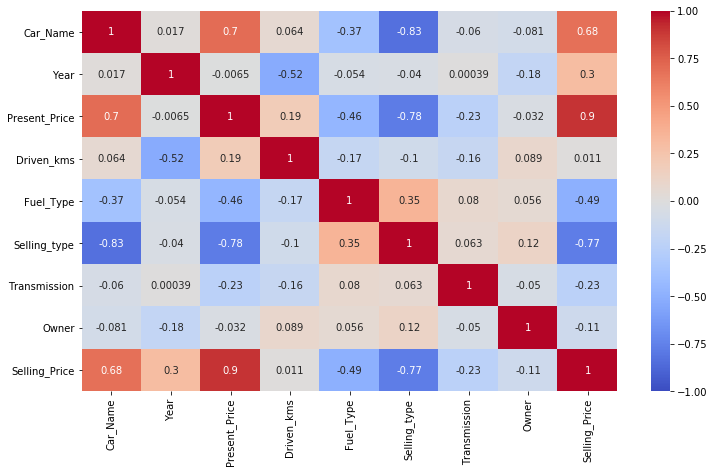

In [21]:
# CORRELATION BETWEEN THE COLUMNS

corr = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,cmap='coolwarm',vmax=1.0,vmin=-1.0,annot=True)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = x.columns
vif_df["VIF Factor"] = [vif(x.values, i) for i in range(x.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,Car_Name,23.47
1,Year,93.70
2,Present_Price,11.17
3,Driven_kms,2.06
4,Fuel_Type,24.30
5,Selling_type,6.83
6,Transmission,8.39
7,Owner,1.07


## scaling the data

In [23]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaler.fit(x)
x = scaler.transform(x)

# Spliting The Dataset:

In [24]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=10)

# using machine learning linear regression models

In [25]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(x_train,y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

65.62774240993865
[ 0.8783995  11.93528034 34.22727786 -3.79576326 -3.66338709 -4.78301578
 -1.17550799 -1.16928922]


In [26]:
#Predict using the model
y_pred = lm.predict(x_test)
print(y_pred)

[116.72150369  25.0227695   40.48268454  37.7522048   76.23579857
 101.2865391  139.92896052 -20.95884313  24.16854424  73.81941022
  14.58470032 119.83413766  70.98991963   6.33228444  85.31261447
  71.85421584  75.93716485 -61.33955633  48.42924221 100.87497421
  37.53710437  57.84053833 104.80811947 156.53609698  -3.89232669
  14.75931285  -1.52580775 -14.91960901  25.95755933 -30.38902847
  17.91210901 148.01258811  72.67384091 117.0363325   17.06132745
  99.9527489   46.7546029   62.43375982  40.48497935  65.8424905
  86.11083531  16.66509117  95.08244118  -4.47720183 134.42755604
  77.39724199  -5.26899416  81.87095301 114.38141658  34.37599899
   4.06605549 102.91894285  25.40331046 127.60693801  79.36525208
  65.24219253 123.75643984  20.09510446 111.19712536 132.82805469
  45.75970312]


In [27]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9073925958290093
RMSE: 13.850943805212697
Adj R-square: 0.9048554066736397


In [28]:
from sklearn.linear_model import Ridge
#create a model object
rid = Ridge()
#train the model object
rid.fit(x_train,y_train)

#print intercept and coefficients
print(rid.intercept_)
print(rid.coef_)

65.63353805222742
[ 0.98451639 11.90496317 33.81166662 -3.69136258 -3.70124963 -4.95972494
 -1.2390313  -1.16095884]


In [29]:
y_pred = rid.predict(x_test)

In [30]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9096832892638032
RMSE: 13.678565932225649
Adj R-square: 0.9072088588326744


In [31]:
from sklearn.linear_model import ElasticNet
#create a model object
EN = ElasticNet(alpha=1, l1_ratio=0)    #Hyperparameter
#train the model object
EN.fit(x_train,y_train)

#print intercept and coefficients
print(EN.intercept_)    #Parameter
print(EN.coef_)

66.19160800781222
[ 5.92815874  5.73590708 12.95401578 -0.4701377  -4.60459371 -7.90933875
 -2.56189982 -0.86142077]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.521e+04, tolerance: 4.297e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [32]:
y_pred = EN.predict(x_test)

In [33]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8425490679365716
RMSE: 18.060473398293745
Adj R-square: 0.8382353437704503


In [34]:
from sklearn.linear_model import Lasso
#create a model object
las = Lasso()
#train the model object
las.fit(x_train,y_train)

#print intercept and coefficients
print(las.intercept_)
print(las.coef_)

65.762187795861
[ 0.28294657 12.39323714 33.32383365 -0.7953462  -2.70454142 -4.93656053
 -0.12730342 -0.38718319]


In [35]:
y_pred = las.predict(x_test)

In [36]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9363416261476174
RMSE: 11.483764613880329
Adj R-square: 0.9345975611105658


# Result of all the models :

In [38]:
results = pd.DataFrame({
    'Model': ['linear reg','ridge','elastic net','lasso'],
    'Score': [90.73,90.96,84.25,93.63]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(10)

,Model
Score,
93.63,lasso
90.96,ridge
90.73,linear reg
84.25,elastic net


## Out of all the model used in the prediction of price of car, the lasso model is giving a high accuracy of 93.63% and showing best result than the other models